In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Employee Performance System


# 1.	Import the data provided, find out the predictor & target variables and look for missing values.

### Importing Required Libraries and Reading DataSet

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('EPMS_Employee_Performance_Project_Data_.xls')
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,1001000,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,1001000,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,1001000,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,1001000,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1001000,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,1001000,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,1001000,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,1001000,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


#### The Dataset Contains 1200 rows and 28 Columns

In [4]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,1001000,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,1001000,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,1001000,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,1001000,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [5]:
df.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,1001000,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,1001000,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,1001000,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,1001000,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3
1199,1001000,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,...,1,4,3,3,2,2,2,0,Yes,2


In [6]:
df.shape

(1200, 28)

In [7]:
df.isnull()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   int64 
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

#### There is No Null Values Present in Dataset

In [11]:
df.describe()

,EmpNumber,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.0,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,1001000.0,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,0.0,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,1001000.0,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1001000.0,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,1001000.0,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,1001000.0,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,1001000.0,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


### There is no Missing values in Dataset and there is no outliars present in dataset.
### Target Variable is PerformanceRating i.e(Dependent variable)

# 2.	Analysis of Department wise performance as asked.


Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

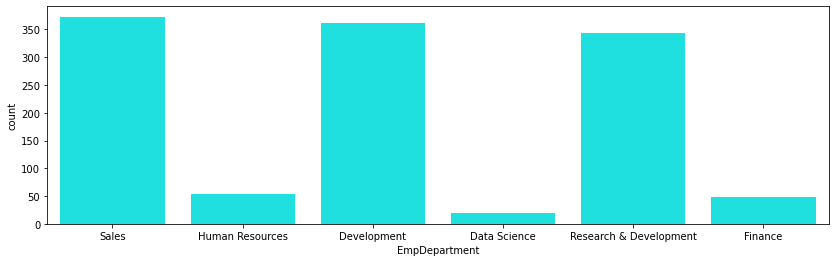

In [12]:
plt.figure(figsize=(14, 4))
sns.countplot(x=df['EmpDepartment'],color="aqua")
df["EmpDepartment"].value_counts()

In [13]:
df['EmpDepartment'].min()

'Data Science'

In [14]:
df.min()

EmpNumber                                1001000
Age                                           18
Gender                                    Female
EducationBackground              Human Resources
MaritalStatus                           Divorced
EmpDepartment                       Data Science
EmpJobRole                      Business Analyst
BusinessTravelFrequency               Non-Travel
DistanceFromHome                               1
EmpEducationLevel                              1
EmpEnvironmentSatisfaction                     1
EmpHourlyRate                                 30
EmpJobInvolvement                              1
EmpJobLevel                                    1
EmpJobSatisfaction                             1
NumCompaniesWorked                             0
OverTime                                      No
EmpLastSalaryHikePercent                      11
EmpRelationshipSatisfaction                    1
TotalWorkExperienceInYears                     0
TrainingTimesLastYea

In [15]:
df['EmpDepartment'].max()

'Sales'

In [16]:
df.max()

EmpNumber                                1001000
Age                                           60
Gender                                      Male
EducationBackground             Technical Degree
MaritalStatus                             Single
EmpDepartment                              Sales
EmpJobRole                        Technical Lead
BusinessTravelFrequency            Travel_Rarely
DistanceFromHome                              29
EmpEducationLevel                              5
EmpEnvironmentSatisfaction                     4
EmpHourlyRate                                100
EmpJobInvolvement                              4
EmpJobLevel                                    5
EmpJobSatisfaction                             4
NumCompaniesWorked                             9
OverTime                                     Yes
EmpLastSalaryHikePercent                      25
EmpRelationshipSatisfaction                    4
TotalWorkExperienceInYears                    40
TrainingTimesLastYea

### Sales, Development &  Research and develepment are Department performing well as compared to other departments

# 3.	Label Encoding the ordinal columns.

In [17]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [18]:
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['EducationBackground']= label_encoder.fit_transform(df['EducationBackground'])
df['MaritalStatus']= label_encoder.fit_transform(df['MaritalStatus'])
df['EmpDepartment']= label_encoder.fit_transform(df['EmpDepartment'])
df['EmpJobRole']= label_encoder.fit_transform(df['EmpJobRole'])
df['BusinessTravelFrequency']= label_encoder.fit_transform(df['BusinessTravelFrequency'])
df['OverTime']= label_encoder.fit_transform(df['OverTime'])
df['Attrition']= label_encoder.fit_transform(df['Attrition'])
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,1001000,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,1001000,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,1001000,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,1001000,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,1001000,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1001000,27,0,3,0,5,13,1,3,1,...,2,6,3,3,6,5,0,4,0,4
1196,1001000,37,1,1,2,1,15,2,10,2,...,1,4,2,3,1,0,0,0,0,3
1197,1001000,50,1,3,1,1,15,2,28,1,...,3,20,3,3,20,8,3,8,0,3
1198,1001000,34,0,3,2,0,1,2,9,3,...,2,9,3,4,8,7,7,7,0,3


# 4.	Calculate correlation coefficient to find out the relationship between variables and then select the important features for analysis.


Text(0.5, 1.0, 'Spearman Correlation')

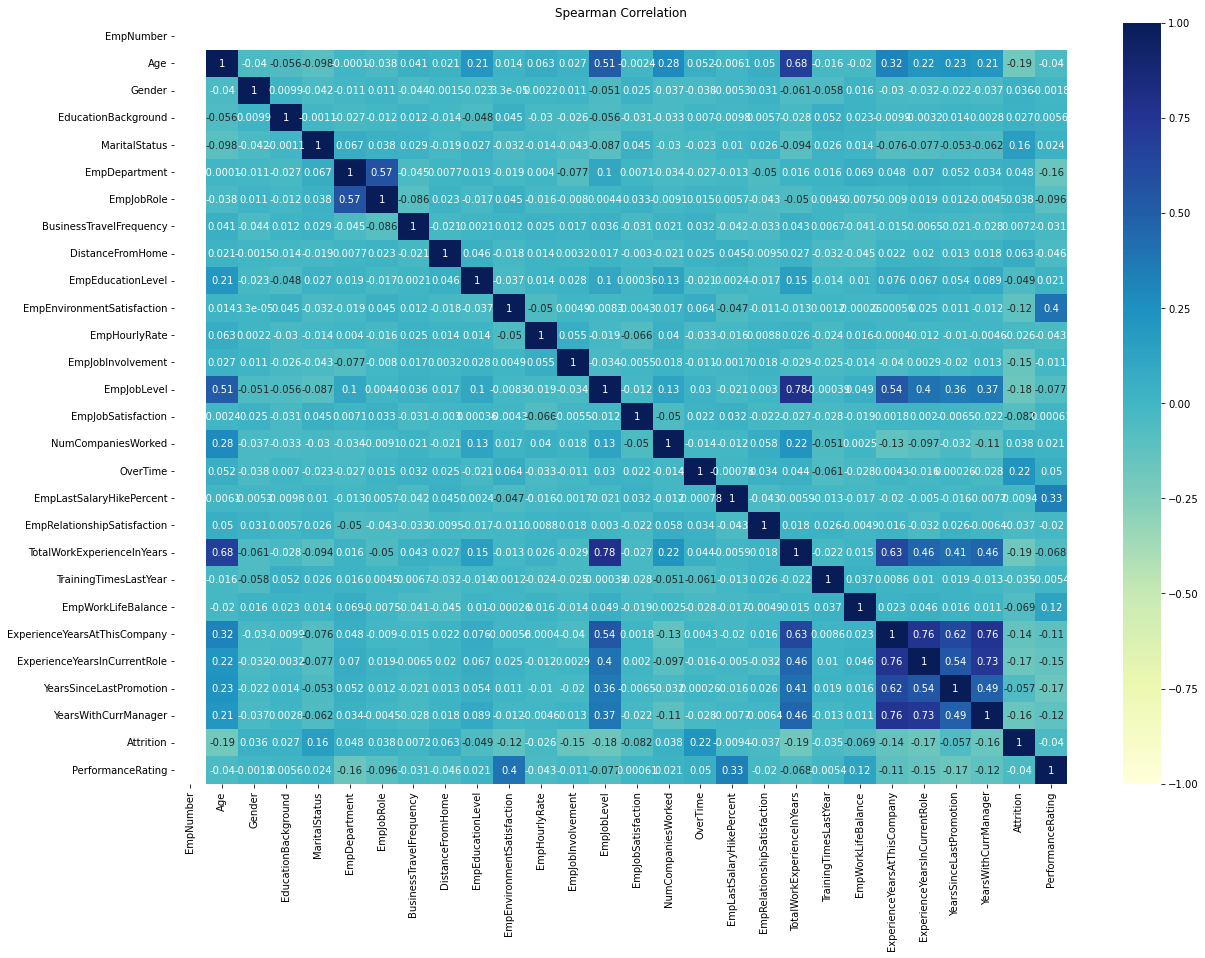

In [19]:
def display_correlation(df):
    r = df.corr(method="spearman")
plt.figure(figsize=(20,14))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,cmap="YlGnBu")
plt.title("Spearman Correlation")

### TotalWorkExperienceInYears, EmpjobLevel, EmpJobRole & EmpEnvironmentSatisfication are corelate with PerformanceRating

# 5.	Standardizing the data and splitting it into test and train.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.loc[:,df.columns!="PerformanceRating"]

In [22]:
X.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1001000,32,1,2,2,5,13,2,10,3,...,12,4,10,2,2,10,7,0,8,0
1,1001000,47,1,2,2,5,13,2,14,4,...,12,4,20,2,3,7,7,1,7,0
2,1001000,40,1,1,1,5,13,1,5,4,...,21,3,20,2,3,18,13,1,12,0
3,1001000,41,1,0,0,3,8,2,10,4,...,15,2,23,2,2,21,6,12,6,0
4,1001000,60,1,2,2,5,13,2,16,4,...,14,4,10,1,3,2,2,2,2,0


In [23]:
y = df["PerformanceRating"]

In [24]:
y.head()

0    3
1    3
2    4
3    3
4    3
Name: PerformanceRating, dtype: int64

Training set is used to train the model and test set is used to test its performance

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=0)

In [26]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(960, 27) (240, 27) (960,) (240,)


# 6.	Training the data using algorithms like Logistic Regression, Support Vector Machine, Decision Tree, Random Forest, Naive Bayes, K-Nearest Neighbour, XGBoost Classifier and Artificial Neural Network and checking the accuracy to find out which algorithm is the best.

# Logistic Regression :-

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
import statsmodels.api as sn

In [29]:
clf_lrs = LogisticRegression()

In [30]:
clf_lr = LogisticRegression()
clf_lr.fit(X,y)

LogisticRegression()

In [31]:
# its a value of Beta1,2,....
clf_lr.coef_

array([[-3.73016617e-07, -9.49606486e-12, -1.80709749e-13,
        -9.96276510e-13, -3.77751684e-13,  2.67759135e-12,
         2.27066070e-12, -6.05030173e-13, -1.96140850e-13,
        -1.37904147e-12, -6.46436348e-12, -1.38364366e-11,
        -1.09092719e-12,  3.67899704e-13, -9.21662386e-13,
        -1.43970382e-12, -5.57673607e-13, -6.39579951e-12,
        -9.57180093e-13,  2.62162927e-12, -1.17331312e-12,
        -1.55248394e-12,  7.08246581e-12,  5.60241873e-12,
         6.40672942e-12,  4.46217895e-12,  1.23846955e-13],
       [ 1.13070288e-06,  3.88099664e-11,  6.07024021e-13,
         2.73810504e-12,  9.04326283e-13,  1.37325979e-13,
         5.98903755e-12,  2.14809411e-12,  9.73506586e-12,
         3.53895023e-12,  7.31711811e-12,  6.64724360e-11,
         3.34657282e-12,  1.36840420e-12,  2.88309344e-12,
         3.10429636e-12,  8.75312402e-13, -2.62459460e-14,
         3.28514854e-12,  7.30734576e-12,  3.52327427e-12,
         2.81700163e-12, -7.02886884e-13, -1.32482337e-

In [32]:
# value of Beta 0
clf_lr.intercept_

array([-3.72643973e-13,  1.12957330e-12, -7.56929331e-13])

In [33]:
y_train_pred = clf_lr.predict(X_train)
y_test_pred = clf_lr.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [35]:
confusion_matrix(y_train, y_train_pred)

array([[  0, 161,   0],
       [  0, 695,   0],
       [  0, 104,   0]], dtype=int64)

In [36]:
confusion_matrix(y_test,y_test_pred)

array([[  0,  33,   0],
       [  0, 179,   0],
       [  0,  28,   0]], dtype=int64)

In [37]:
print(accuracy_score(y_test, y_test_pred)*100)

74.58333333333333


In [38]:
accuracy_score(y_test, y_test_pred)
percentage = "{:.2%}".format(accuracy_score(y_test, y_test_pred))
print("Logistic Regression =" ,percentage)

Logistic Regression = 74.58%


- Logistic Regression = 74.58%

# Support Vector Machine :-

In [39]:
from sklearn import svm

In [40]:
clf_svm_1 = svm.SVC(kernel='linear',C=0.01)

In [41]:
from sklearn import preprocessing

In [42]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)

In [43]:
scaler = preprocessing.StandardScaler().fit(X_test)
X_test_s = scaler.transform(X_test)

In [44]:
clf_svm_1.fit(X_train, y_train)

SVC(C=0.01, kernel='linear')

##### Predict value using trained model

In [45]:
y_train_pred = clf_svm_1.predict(X_train_s)
y_test_pred = clf_svm_1.predict(X_test_s)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [46]:
y_test_pred

array([2, 3, 4, 3, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 3, 2, 3, 4,
       3, 2, 4, 4, 2, 3, 4, 4, 4, 4, 4, 3, 2, 3, 2, 4, 3, 2, 2, 2, 4, 4,
       3, 4, 2, 2, 3, 4, 3, 3, 4, 2, 3, 3, 3, 2, 2, 4, 3, 2, 2, 4, 2, 2,
       2, 2, 2, 3, 2, 4, 3, 3, 2, 3, 4, 2, 2, 2, 2, 4, 3, 3, 4, 2, 3, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 3, 2, 4, 3, 4, 3, 2, 2, 4, 2, 2, 4, 2, 4,
       3, 3, 4, 3, 2, 3, 4, 2, 2, 4, 2, 2, 2, 3, 2, 4, 4, 2, 2, 4, 2, 4,
       2, 4, 2, 4, 3, 3, 2, 2, 2, 3, 4, 2, 4, 3, 2, 3, 4, 4, 2, 4, 4, 4,
       3, 2, 3, 4, 3, 3, 2, 2, 2, 2, 4, 2, 3, 4, 3, 4, 4, 3, 2, 4, 4, 2,
       3, 2, 4, 3, 3, 4, 3, 2, 2, 4, 3, 4, 4, 3, 3, 2, 3, 2, 4, 3, 3, 2,
       2, 3, 3, 3, 2, 4, 4, 2, 4, 3, 4, 3, 3, 3, 4, 2, 4, 4, 2, 3, 4, 3,
       2, 4, 3, 2, 4, 4, 2, 2, 2, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3],
      dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [48]:
confusion_matrix(y_test, y_test_pred)

array([[20,  6,  7],
       [67, 65, 47],
       [ 4,  2, 22]], dtype=int64)

##### Model performance

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [50]:
accuracy_score(y_test, y_test_pred)*100

44.583333333333336

In [51]:
accuracy_score(y_test, y_test_pred)
percentage = "{:.2%}".format(accuracy_score(y_test, y_test_pred))
print("Support Vector Machine Accuracy=" ,percentage)

Support Vector Machine Accuracy= 44.58%


- Support Vector Machine Accuracy= 44.58%

# Decision Tree :-

In [52]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth=3)

In [53]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [54]:
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

##### Model Performance

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [56]:
confusion_matrix(y_test,y_test_pred)

array([[ 32,   1,   0],
       [ 20, 158,   1],
       [  1,   3,  24]], dtype=int64)

In [57]:
accuracy_score(y_test, y_test_pred)

0.8916666666666667

In [58]:
accuracy_score(y_test, y_test_pred)
percentage = "{:.2%}".format(accuracy_score(y_test, y_test_pred))
print("Decision Tree =" ,percentage)

Decision Tree = 89.17%


##### Plotting decision tree

In [60]:
from IPython.display import Image

In [61]:
import pydotplus

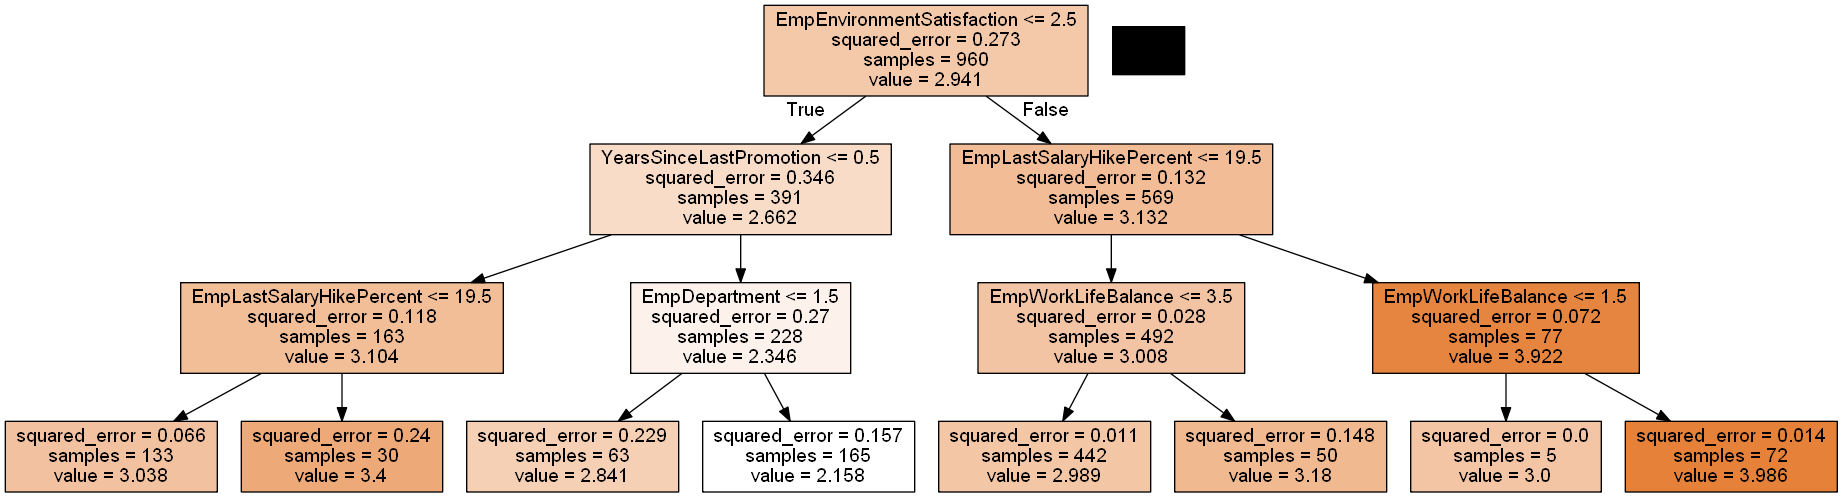

In [62]:
regtree1 = tree.DecisionTreeRegressor(max_depth = 3)
regtree1.fit(X_train, y_train)
dot_data = tree.export_graphviz(regtree1, out_file=None,feature_names = X_train.columns, filled = True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

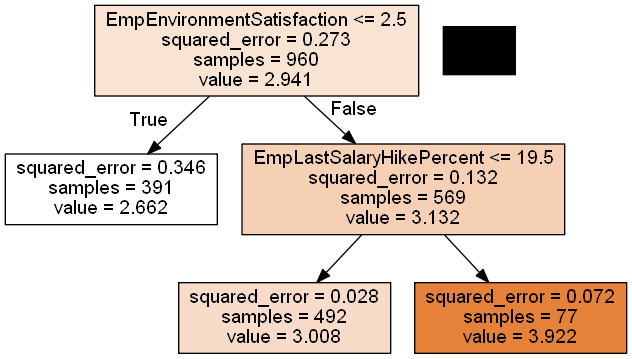

In [63]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split = 500)
regtree2.fit(X_train, y_train)
dot_data = tree.export_graphviz(regtree2, out_file=None,feature_names = X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

- Decision Tree = 89.17%

# Random Forest :-

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf_clf = RandomForestClassifier

In [66]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [67]:
from sklearn import preprocessing

In [68]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)

In [69]:
scaler = preprocessing.StandardScaler().fit(X_test)
X_test_s = scaler.transform(X_test)

In [70]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [71]:
y_train_pred = rf_clf.predict(X_train_s)
y_test_pred = rf_clf.predict(X_test_s)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [73]:
confusion_matrix(y_test,rf_clf.predict(X_test))

array([[ 31,   2,   0],
       [  2, 175,   2],
       [  0,   4,  24]], dtype=int64)

In [74]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.9583333333333334

In [75]:
accuracy_score(y_test, rf_clf.predict(X_test))
percentage = "{:.2%}".format(accuracy_score(y_test, rf_clf.predict(X_test)))
print("Random Forest Accuracy =" ,percentage)

Random Forest Accuracy = 95.83%


- Random Forest Accuracy = 95.83%

# K-Nearest Neighbour :-

In [77]:
X = df.loc[:,df.columns!="PerformanceRating"]

In [78]:
y = df["PerformanceRating"]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=0)

In [80]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(960, 27) (240, 27) (960,) (240,)


In [81]:
from sklearn import preprocessing

In [82]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)

In [83]:
scaler = preprocessing.StandardScaler().fit(X_test)
X_test_s = scaler.transform(X_test)

In [84]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn_1 = KNeighborsClassifier(n_neighbors=3)
clf_knn_1.fit(X_train_s, y_train)

KNeighborsClassifier(n_neighbors=3)

In [85]:
y_train_pred = clf_knn_1.predict(X_train_s)
y_test_pred = clf_knn_1.predict(X_test_s)

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [87]:
confusion_matrix(y_test, y_test_pred)

array([[ 14,  19,   0],
       [ 22, 154,   3],
       [  1,  23,   4]], dtype=int64)

In [88]:
accuracy_score(y_test, y_test_pred)

0.7166666666666667

In [89]:
accuracy_score(y_test, y_test_pred)
percentage = "{:.2%}".format(accuracy_score(y_test, y_test_pred))
print("KNN Accuracy =" ,percentage)

KNN Accuracy = 71.67%


- KNN Accuracy = 71.67%

# XGBoost Classifier :-

In [90]:
import xgboost as xgb

In [91]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimator=10000, learning_rate=0.3, n_jobs=-1)

In [92]:
xgb_clf.fit(X_train, y_train)

[01:13:29] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:13:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimator=10000, n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [93]:
y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [95]:
confusion_matrix(y_test, y_test_pred)

array([[ 32,   1,   0],
       [  3, 172,   4],
       [  1,   3,  24]], dtype=int64)

In [96]:
accuracy_score(y_test, y_test_pred)

0.95

In [97]:
accuracy_score(y_test, y_test_pred)
percentage = "{:.2%}".format(accuracy_score(y_test, y_test_pred))
print("XGBoost Accuracy =" ,percentage)

XGBoost Accuracy = 95.00%


- XGBoost Accuracy = 95.00%

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

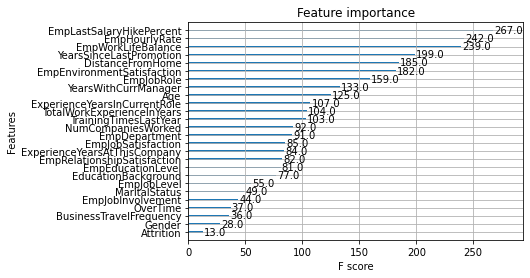

In [98]:
xgb.plot_importance(xgb_clf)

The most important to least important feature

# Model Performance :- 

### Logistic Regression =     74.58%
### Support Vector Machine =  44.58%
### Decision Tree =           89.17%
### Random Forest =           95.83%
### K-Nearest Neighbour =     71.67%
### XGBoost Classifier =      95.00%

# Classification Report

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           2       0.89      0.97      0.93        33
           3       0.98      0.96      0.97       179
           4       0.86      0.86      0.86        28

    accuracy                           0.95       240
   macro avg       0.91      0.93      0.92       240
weighted avg       0.95      0.95      0.95       240



# Q1. Department wise performances.

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

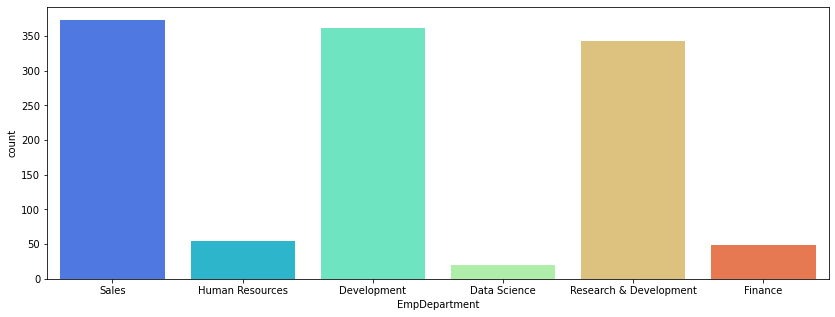

In [4]:
plt.figure(figsize=(14, 5))
sns.countplot(x=df['EmpDepartment'],palette='rainbow')
df["EmpDepartment"].value_counts()

- Sales
- Development 
- Research and Development 
Department performance is good as compared to other Depatments

# Q2. Top 3 Important Factors effecting employee performance.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

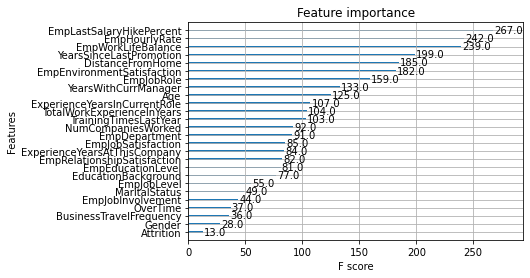

In [101]:
xgb.plot_importance(xgb_clf)

####   Emp Last Salary Hike Percent, Emp Hourly Rate, Years Since Last Promotion

#### This are the factors affecting Emoloyee Performance

# Q3.A trained model which can predict the employee performance based on factors as inputs.

####  Random Forest having the highest accuracy of 95.83% 
#### which can predict the employee performance based on factors

# Q4.Recommendations to improve the employee performance based on insights from analysis.


- The factors to improve employee perfomance is we have to increase a Salary hike percent, Employees promotion we have to focus on and hour rate

- From Analysis we have to increase our focus on Departments of employee because some departments are not performing well

- To increase the employee performance Employee Satisfication is important because it is highly related to Employee performance

- Good performing Employees are those who have more work experience,good job position and satisfactory job role.

# Employee Performance Management Project

# 1.Face Recognition system for Employee Attendance using Python and available APIs and face recognition libraries 

#### Importing required Libraries

In [1]:
import cv2
import numpy as np
import face_recognition
import os
from datetime import datetime

#### Opening Images folder and Encoding all the images

In [2]:
path = 'images'
images = []
classNames = []
myList = os.listdir(path)
print(myList)
for cl in myList:
    curImg = cv2.imread(f'{path}/{cl}')
    images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])
print(classNames)

def findEncodings(images):
    encodeList = []
    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(img)[0]
        encodeList.append(encode)
    return encodeList
encodeListKnown = findEncodings(images)
print("Encoding Complete")

['Morkel.JPG', 'Rose.JPG', 'Sam.JPG', 'Scarlet.JPG', 'Tucker.JPG']
['Morkel', 'Rose', 'Sam', 'Scarlet', 'Tucker']
Encoding Complete


#### Creating csv file for recording attendance in Name, Time, Date format

In [3]:
def MarkAttendance(name):
    with open("Attendance.csv",'r+') as f:
        myDataList = f.readlines()
        dateList = []
        for line in myDataList:
            entry = line.split(',')
            dateList.append(entry[0])
        if date not in dateList:
            now = datetime.now()
            dtString = now.strftime('%H:%M:%S')
            dstr = now.strftime('%d/%m/%Y')
            f.writelines(f'\n{name},{dtString},{dstr}')

#### Opening Webcam, Reading images and marking attendance in csv file

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    success, img = cap.read()
    imgS = cv2.resize(img,(0,0),None,0.25,0.25)
    imgS = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)
    facesCurFrame = face_recognition.face_locations(imgS)
    encodeCurFrame = face_recognition.face_encodings(imgS,facesCurFrame)
    
    for encodeFace, faceLoc in zip(encodeCurFrame,facesCurFrame):
        matches = face_recognition.compare_faces(encodeListKnown,encodeFace)
        faceDis = face_recognition.face_distance(encodeListKnown,encodeFace)
        #print(faceDis)
        matchIndex = np.argmin(faceDis)
        
        now = datetime.now()
        date = now.strftime('%d/%m/%Y')
        
        if matches[matchIndex]:
            name = classNames[matchIndex].upper()
            #print(name)
            y1,x2,y2,x1 = faceLoc
            y1, x2, y2, x1 = y1*4,x2*4,y2*4,x1*4
            cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)
            cv2.rectangle(img,(x1,y2-35),(x2,y2),(0,255,0),cv2.FILLED)
            cv2.putText(img,name,(x1+6,y2-6),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),2)
            MarkAttendance(name)
            
cv2.imshow('Webcam',img)
cv2.waitKey(1)

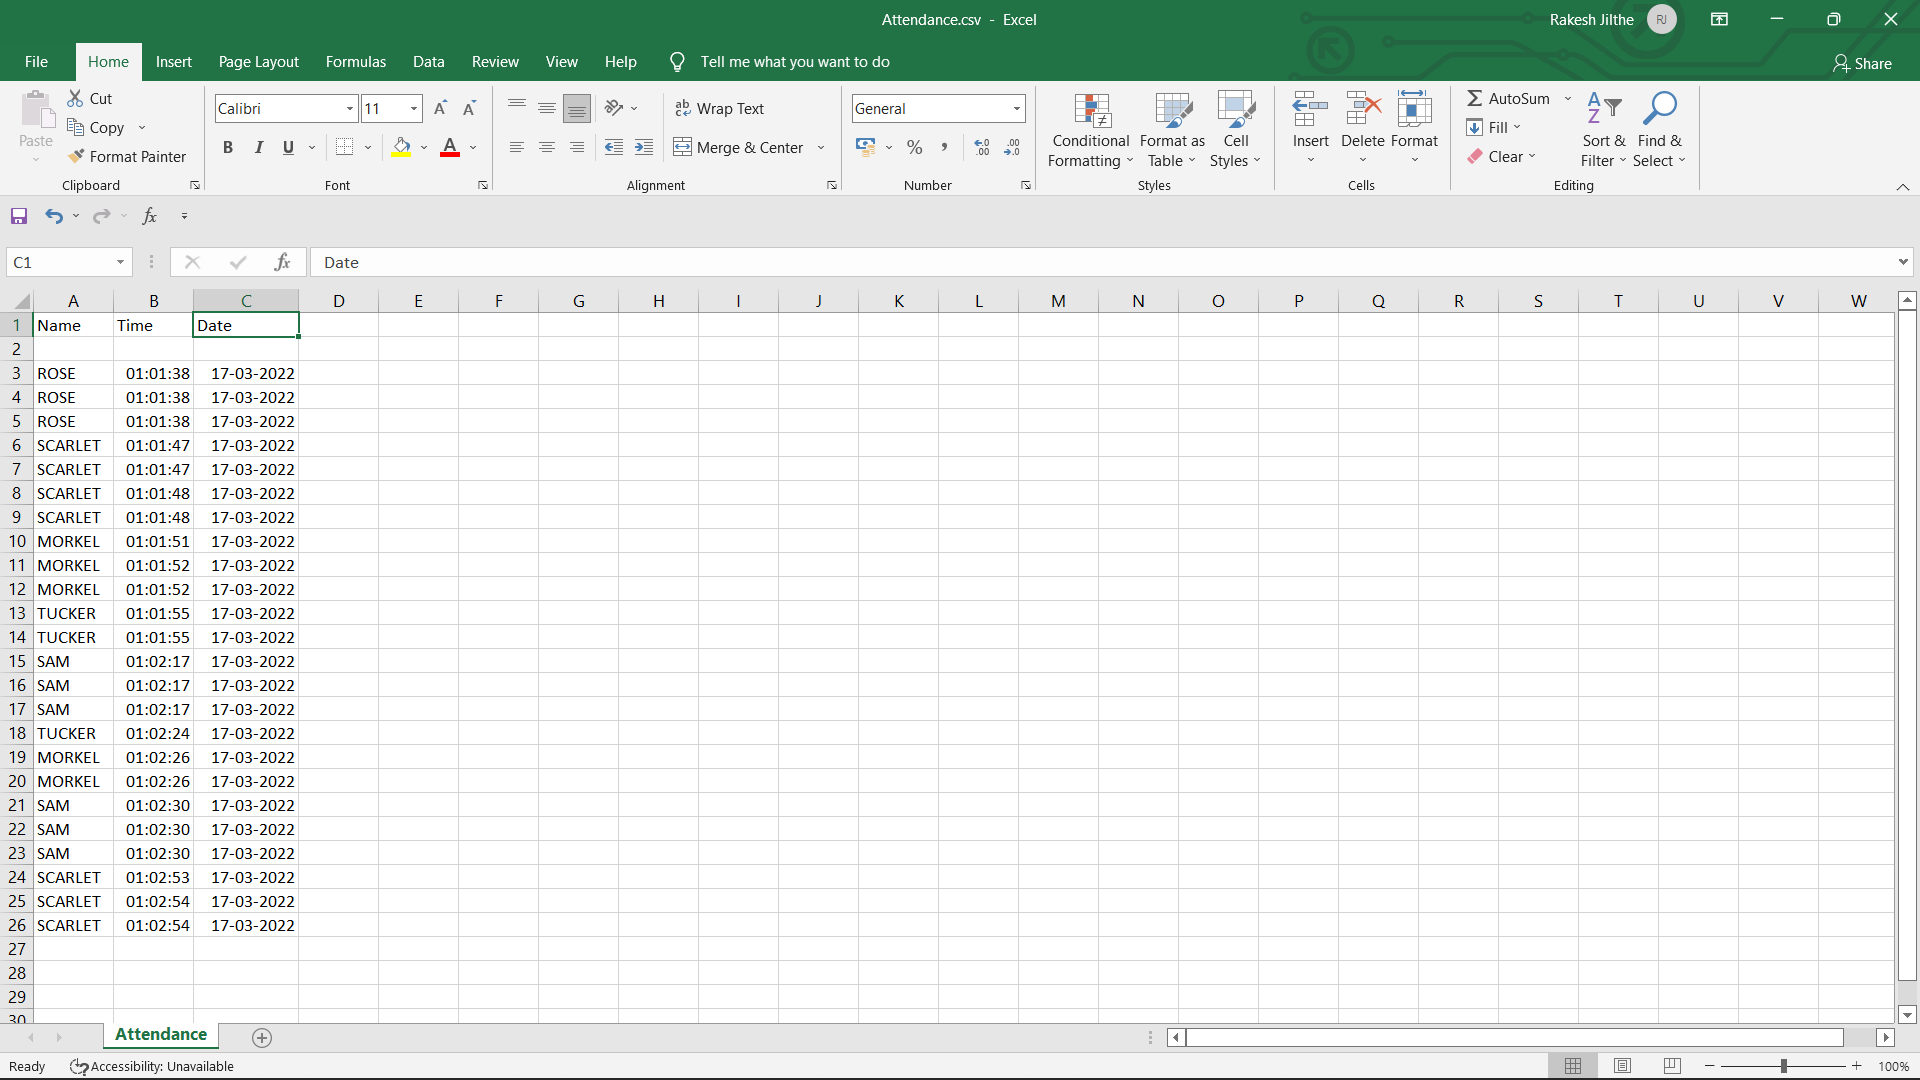

In [15]:
from IPython.display import Image
Image(filename="SS.png",width=700,height=10)

The above Code Records the attendance of people in csv file 

# 3.	Using Employee attendance data do the following data analysis:

In [6]:
# WORKING ON NEW DATASET 

#### Importing Libraries and Reading a data set

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df1 = pd.read_csv('Absenteeism_at_work.csv',delimiter=";")
df1

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


#### The DataSet Contains 740 rows and 21 Columns

In [5]:
df1.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [18]:
df1.tail()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/week,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0
739,35,0,0,6,3,179,45,14,53,271.219,...,0,1,1,0,0,1,77,175,25,0


In [19]:
df1.shape

(740, 21)

#### Checking Null Values

In [20]:
df1.isnull()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/week,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
736,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
737,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
738,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
df1.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/week             0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/week           740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

#### There is no Null values in dataset

In [14]:
print(df1.columns.tolist())

['ID', 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']


In [11]:
df1.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


#### There is no Outliers present in DataSet

# 3.	Using Employee attendance data do the following data analysis:

# 3A.	Create a Histogram of Absence Hours.

array([[<AxesSubplot:title={'center':'Absenteeism time in hours'}>]],
      dtype=object)

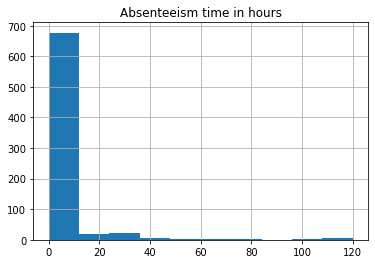

In [23]:
df1.hist(column='Absenteeism time in hours',bins = 10)

# 3B.	Plot workload per employee and analyse maximum, minimum and average workload bearing employees so that workload can be distributed evenly.


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ID', ylabel='Work load Average/day '>

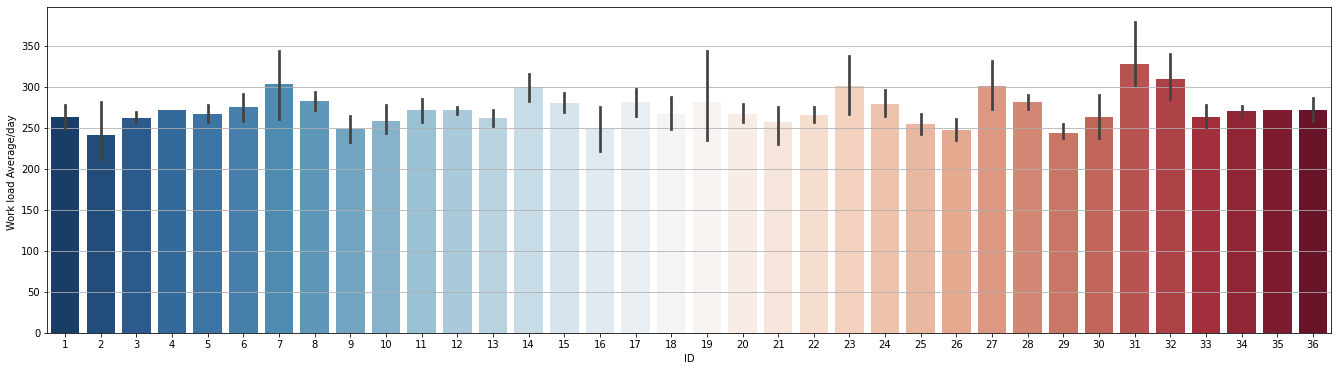

In [85]:
df1["ID"],df1["Work load Average/day "].value_counts()
plt.figure(figsize=(23, 6))
plt.grid()
sns.barplot(df1['ID'],df1['Work load Average/day '],palette="RdBu_r")

- Maximum workload = 7,14,23,27,31,& 32 This employee having worload more than 300 hours
- Minimum workload = 2,9,16,26,& 29 This employee having worload less than 250 hours
- Average workload = 1,3,4,5,6,8,10,11,12,13,15,17,18,19,20,21,22,24,25,28,30,33,34,35,& 36 This employee having worload in between 250 to 300

# 3C.	Find the positive and negative correlation among following factors in regard to employee absentism: -  


Text(0.5, 1.0, 'Spearman Correlation')

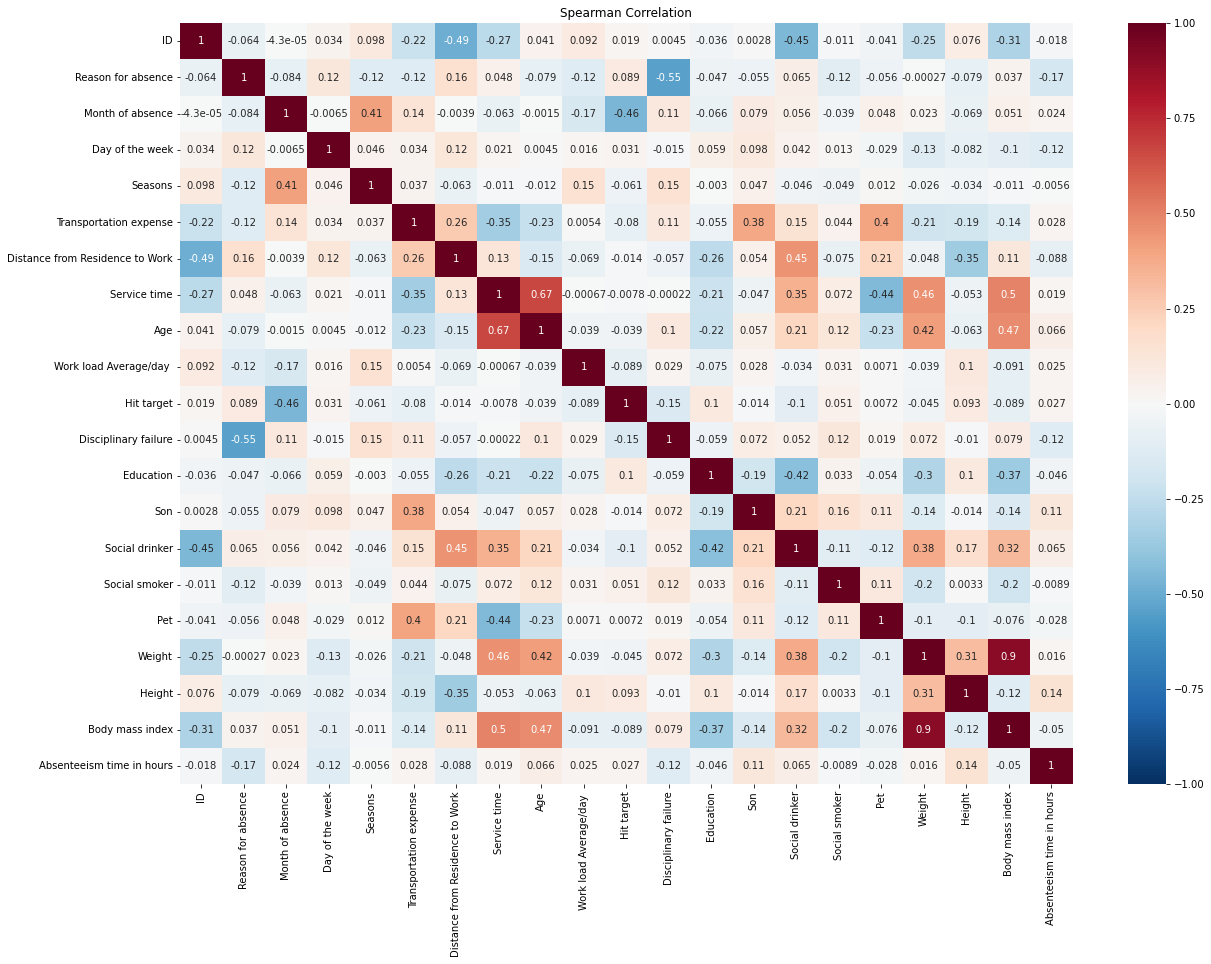

In [109]:
def display_correlation(df1):
    r = df1.corr(method="spearman")
plt.figure(figsize=(20,14))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True,cmap="RdBu_r")
plt.title("Spearman Correlation")

#### There is Corelation between Absenteeism time in hours and (Reason For absence, Day of the week, Disciplinary failure, & Son)

# 3Ca.	Age & ServiceTime


<AxesSubplot:xlabel='Age', ylabel='Service time'>

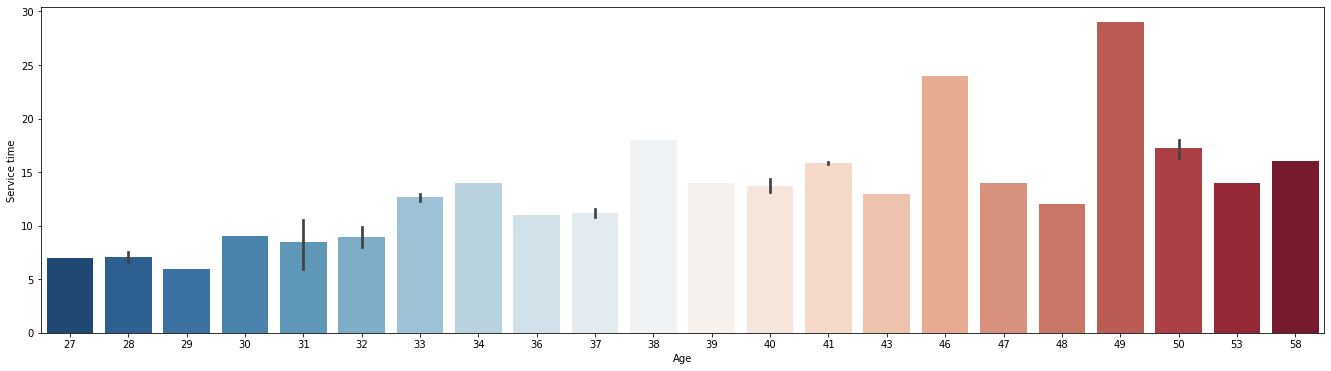

In [84]:
plt.figure(figsize=(23,6))
sns.barplot(x=df1["Age"],y=df1["Service time"],palette='RdBu_r')

#### - people who are having age 49,46 & 38 giving more service time as compared to other

## 3Cb.	HitTargetMaximum & Number of Reasons


<AxesSubplot:xlabel='Hit target', ylabel='Reason for absence'>

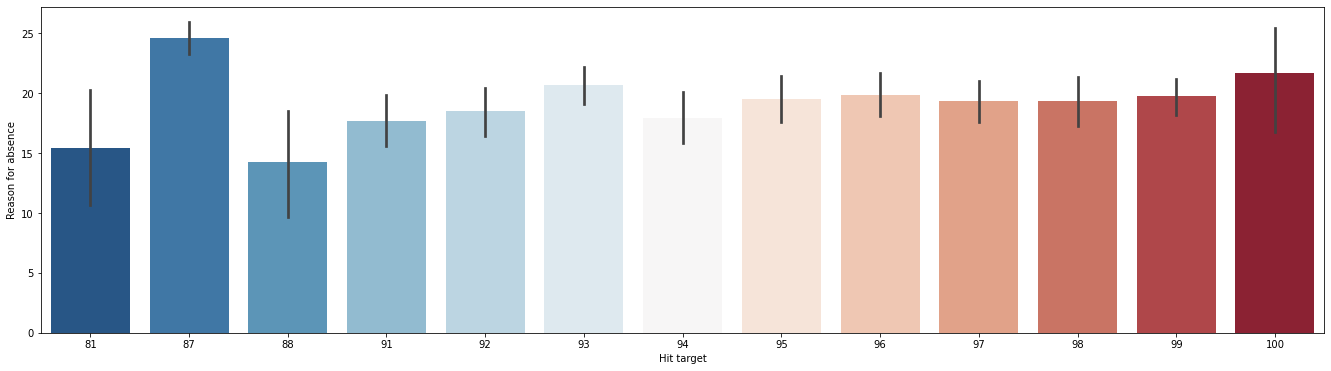

In [89]:
plt.figure(figsize=(23,6))
sns.barplot(x=df1["Hit target"],y=df1["Reason for absence"],palette='RdBu_r')

## 3Cc.	HitTargetMaximum & Sum of Absence Hours


## 3Cd.	HitTargetMinimum & Sum of Absence Hours


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hit target', ylabel='Absenteeism time in hours'>

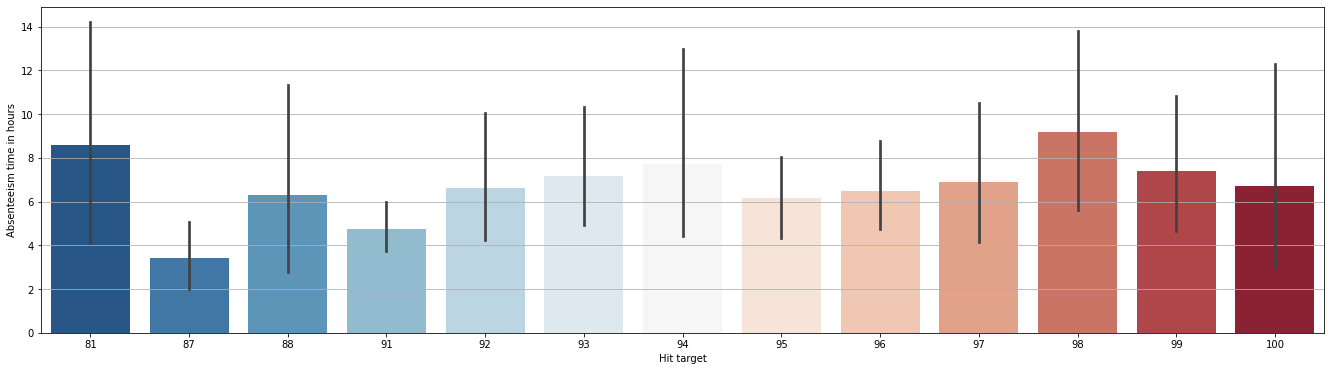

In [28]:
df1["Hit target"],df1["Absenteeism time in hours"].value_counts()
plt.figure(figsize=(23, 6))
plt.grid()
sns.barplot(df1['Hit target'],df1['Absenteeism time in hours'],palette="RdBu_r")

#### 98 is the maximum Hit Target 
#### 87 is the minimum Hit Target

# 3D.	Also find how many hours an employee was absent:


## 3Da.	for a certain reasons like Fever, Bone Fracture, Cold & Cough


<AxesSubplot:xlabel='ID', ylabel='Reason for absence'>

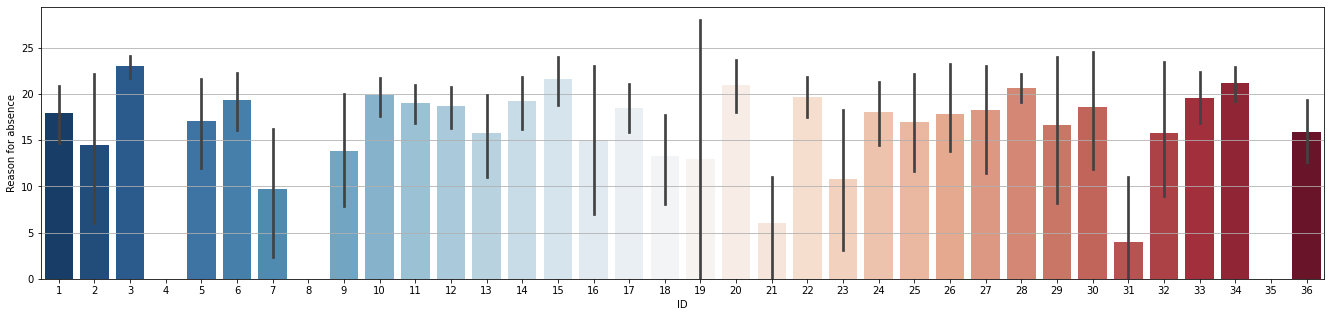

In [13]:
plt.figure(figsize=(23,5))
plt.grid()
sns.barplot(x=df1["ID"],y=df1["Reason for absence"],palette='RdBu_r')

## 3Db.	In a certain month like October and November due to festivals


<AxesSubplot:xlabel='Month of absence', ylabel='Absenteeism time in hours'>

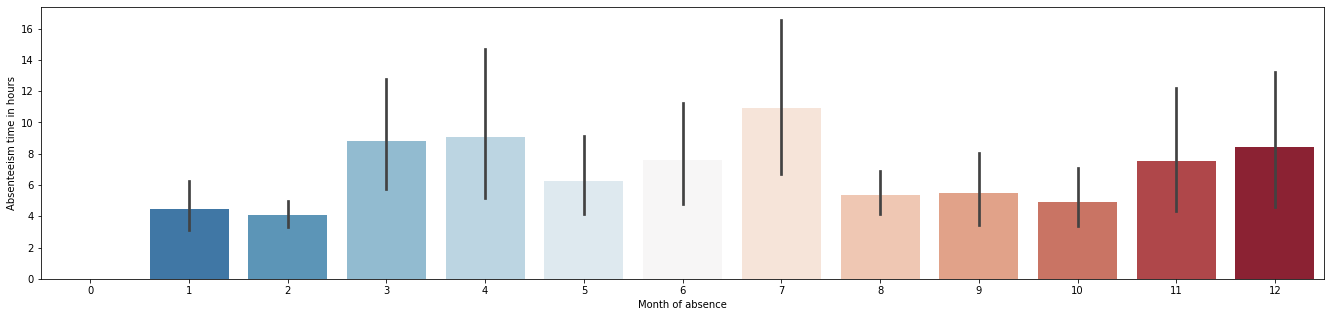

In [71]:
plt.figure(figsize=(23,5))
sns.barplot(x=df1["Month of absence"],y=df1["Absenteeism time in hours"],palette="RdBu_r")

#### - Most Number of employee were absent in March, April & August month 

## 3Dc.	on a certain weekday like Friday near weekend


<AxesSubplot:xlabel='Day of the week', ylabel='Absenteeism time in hours'>

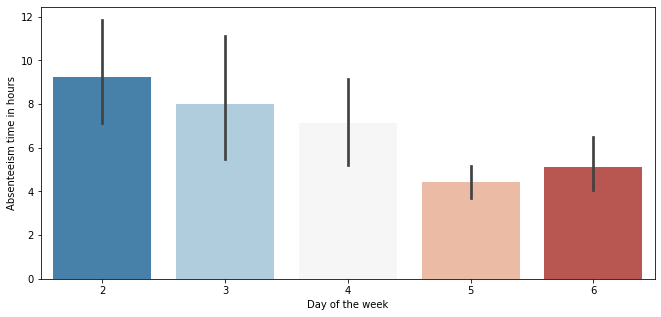

In [98]:
plt.figure(figsize=(11,5))
sns.barplot(x=df1["Day of the week"],y=df1["Absenteeism time in hours"],palette='RdBu_r')

#### On Tuesday Wednesday & Thursday employee absent

## 3Dd.	Analyse over past 3 years


<AxesSubplot:xlabel='Seasons', ylabel='Absenteeism time in hours'>

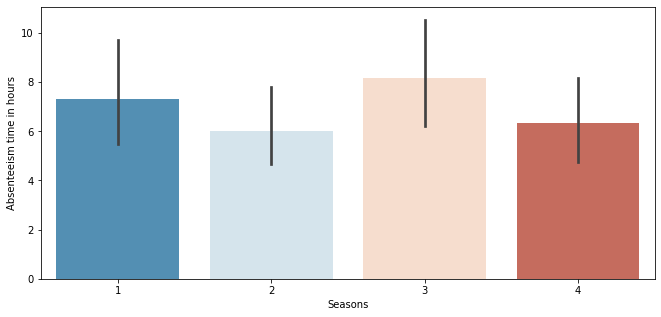

In [100]:
plt.figure(figsize=(11,5))
sns.barplot(x=df1["Seasons"],y=df1["Absenteeism time in hours"],palette='RdBu_r')

#### In 3 year employee were more absent then other years

# 3De.	Employees under Maternity Leave if any


<AxesSubplot:xlabel='ID', ylabel='Absenteeism time in hours'>

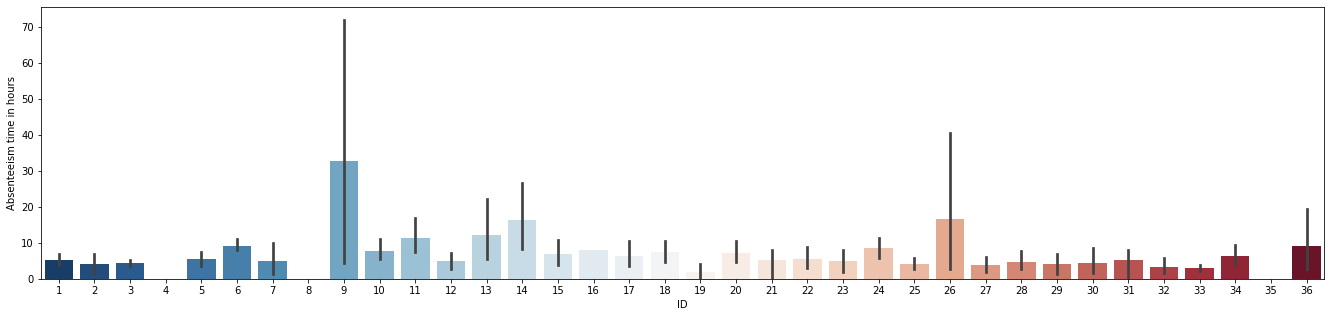

In [107]:
plt.figure(figsize=(23,5))
sns.barplot(x=df1["ID"],y=df1["Absenteeism time in hours"],palette='RdBu_r')

#### No record present for Maternity leave 

# 3Df.	Employees under Higher Study Leave if any


1    611
3     79
2     46
4      4
Name: Education, dtype: int64

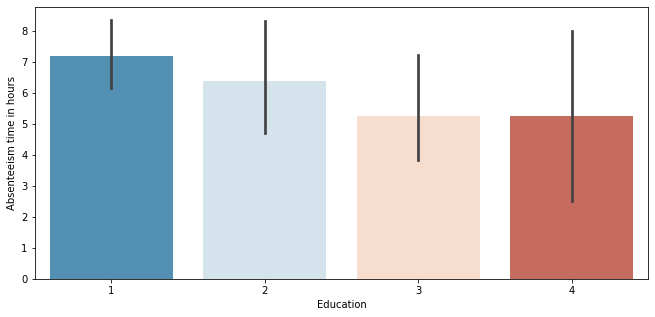

In [103]:
plt.figure(figsize=(11,5))
sns.barplot(x=df1["Education"],y=df1["Absenteeism time in hours"],palette='RdBu_r')
df1["Education"].value_counts()

#### For Education 1 & 2 employee takes more leave

# 3E. Predict how many working hours any employee could be away from work based on information like:
 

# 3Ea.	How far they live from their workplace.

# 3Eb. How many children and pets they have.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df1.drop(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
             'Seasons', 'Transportation expense', 'Service time', 'Age', 
             'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education',
             'Social drinker', 'Social smoker', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours'],axis='columns')

In [6]:
X.head()

,Distance from Residence to Work,Son,Pet
0,36,2,1
1,13,1,0
2,51,0,0
3,5,2,0
4,36,2,1


In [7]:
y = df1["Absenteeism time in hours"]

In [8]:
y.head()

0    4
1    0
2    2
3    4
4    2
Name: Absenteeism time in hours, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [10]:
X_train.head()

,Distance from Residence to Work,Son,Pet
509,25,0,0
391,25,0,0
504,26,0,0
247,36,2,1
576,48,0,2


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm_a = LinearRegression()

In [13]:
lm_a.fit(X_train, y_train)

LinearRegression()

In [14]:
y_test_a = lm_a.predict(X_test)

In [15]:
y_train_a = lm_a.predict(X_train)

In [16]:
from sklearn.metrics import r2_score

In [18]:
r2_score(y_train, y_train_a)

0.024813775529506144

#### It got very low accuracy so there is no relation how far they live or how many childrens and pets they have